<a href="https://colab.research.google.com/github/yashigupta02/tathastu_week_of_code/blob/master/Yashi_week3task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np


In [3]:
import matplotlib.pyplot as plt

In [64]:
import seaborn as sns
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


In [5]:
from google.colab import drive
drive.mount('/content/googledrive')


Mounted at /content/googledrive


In [6]:
housing_data = pd.read_csv('/content/googledrive/MyDrive/HousingData.csv')

Data preprocessing:
Check for null values and replace or drop them, scale the data,
encode the categorical data(if any) 

In [7]:
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [8]:
housing_data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [9]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [10]:
housing_data.describe

<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX  ...  TAX  PTRATIO       B  LSTAT  MEDV
0    0.00632  18.0   2.31   0.0  0.538  ...  296     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222     18.7  396.90    NaN  36.2
..       ...   ...    ...   ...    ...  ...  ...      ...     ...    ...   ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273     21.0  391.99    NaN  22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93   0.0  0.573  ...  273     21.0  396.90   7.88  11.9

[506 rows x 14 co

In [11]:
housing_data.nunique()

CRIM       484
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        348
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      438
MEDV       229
dtype: int64

In [12]:
housing_data.isnull()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [66]:
data = housing_data.dropna()


In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()
scaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [17]:
float_data = data.select_dtypes(include=['float64']).copy()
float_data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,18.7,394.12,5.21,28.7


In [18]:
int_data = data.select_dtypes(include=['int64']).copy()
int_data.head()


,RAD,TAX
0,1,296
1,2,242
2,2,242
3,3,222
5,3,222


Visualise some of the attributes of the dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


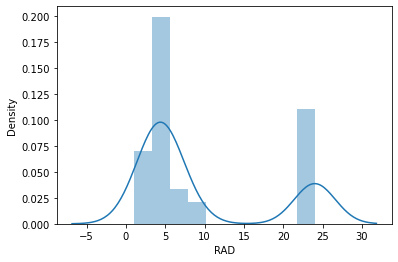

In [19]:
sns.distplot(data['RAD'], bins =10)
plt.show()

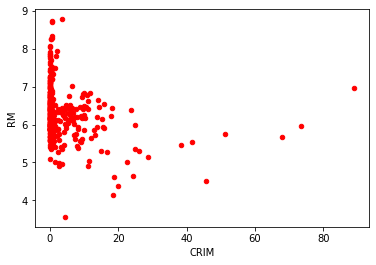

In [20]:
data.plot.scatter(x="CRIM", y="RM", c = "red")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


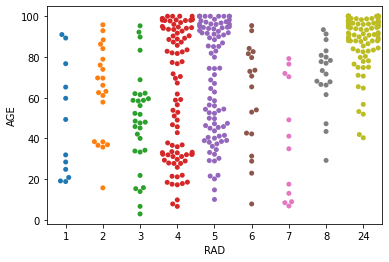

In [21]:
sns.swarmplot(x="RAD", y="AGE", data = data)
plt.show()

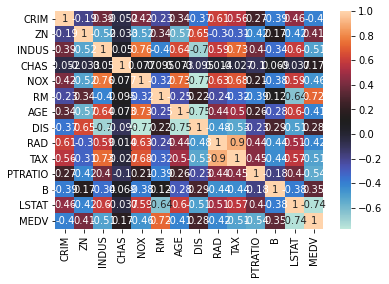

In [22]:
sns.heatmap(data.corr(), annot=True, cmap="icefire")
plt.show()

Observations 

*   AGE has strong positive correlation with INDUS and CHAS has strong negative correlation with every parameter.
*   AGE has a negative correlation of -0.36.
*   TAX has high positive correlation of 0.91 with RAD.



Split the whole dataset between training and testing dataset.

In [23]:
x = pd.DataFrame(np.c_[data['LSTAT'], data['RM']], columns = ['LSTAT', 'RM'])
y = data['MEDV']

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
y_train_predict = linear_model.predict(x_train)
y_test_predict = linear_model.predict(x_test)


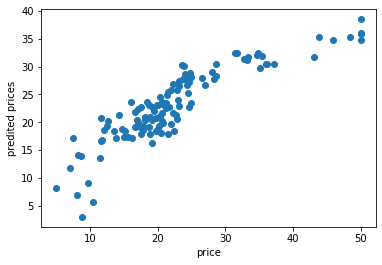

In [34]:
plt.scatter(y_test, y_test_predict)
plt.xlabel('price')
plt.ylabel('predited prices')
plt.show()

KNN


In [41]:
def dis(a,b):
    return np.sqrt(np.sum(a-b)**2)
def knn(tr, tr_lab, te, k):
    distances = []
    for i in range(tr.shape[0]):
        distances.append(dis(tr[i], te))
    distances = np.array(distances)
    inds = np.arsort(distances)
    distances = distances[inds]
    tr_lab2 = tr_lab[inds]
    value = np.average(tr_lab2[:k])
    return value

In [28]:
print(data.keys())


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [29]:

x_train, x_test, y_train, y_test = train_test_split(data.CRIM, data.TAX)

Evaluation metrices

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
a = RandomForestClassifier(n_jobs =-1)
a.fit(x_train.astype('int'), y_train.astype('int'))
confusion_matrix(y_test.astype('int'), a.predict(x_test).astype('int'))
 

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [62]:
a.score(x_test.astype('int'), y_test.astype('int'))

0.10084033613445378

In [65]:
accuracy_score(y_test.astype('int'), a.predict(x_test).astype('int'))

0.08403361344537816